<a href="https://colab.research.google.com/github/ukhyun-lee/stock_market_analysis/blob/main/AI%EC%A4%91%EA%B8%89/AI%EC%8B%A4%EC%8A%B5_8%EC%9B%9422%EC%9D%BC(Unet%2C_ARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

섹션

https://arxiv.org/abs/1505.04597

https://github.com/milesial/Pytorch-UNet

https://www.kaggle.com/c/carvana-image-masking-challenge/data

In [ ]:
!pip install statsmodels

<ipython-input-24-bb8b15db6bf8>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-24-bb8b15db6bf8>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-24-bb8b15db6bf8>:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('sample_data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Tue, 22 Aug 2023   AIC                            411.302
Time:                        09:20:08   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

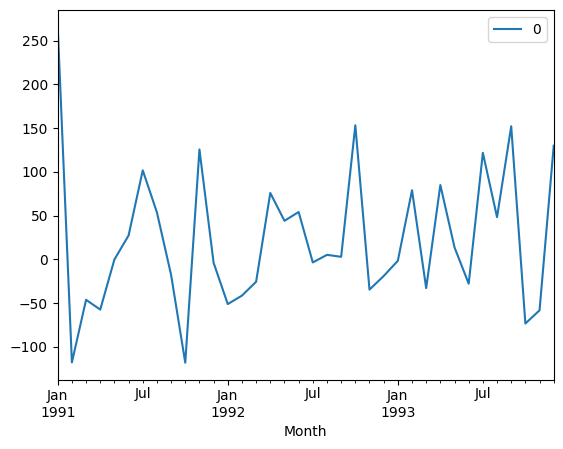

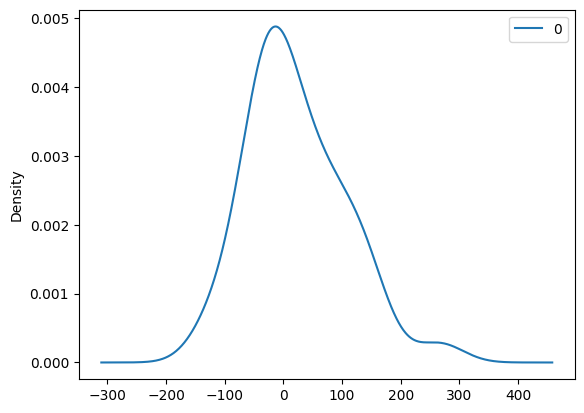

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [24]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import mean_squared_error

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import mean_squared_error

def parser(x) :
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('sample_data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit() #disp=0
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


<ipython-input-18-3d8e8cfaf5b0>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-18-3d8e8cfaf5b0>:12: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('sample_data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070405, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916190, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


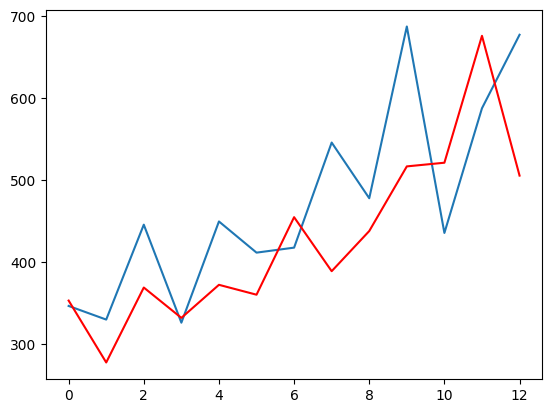

In [18]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import mean_squared_error

def parser(x) :
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('sample_data/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' %(yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3F' %error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# print(model_fit.summary())
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())